In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix # تصوير مصفوفة الإرتباك 

import joblib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(data['Amount'].to_frame())
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [5]:
data.drop('Time',axis=1,inplace= True)

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
data = data.drop_duplicates()

In [8]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [9]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [10]:
fraud.shape

(473, 30)

In [11]:
# هنا سوف نقوم بموازنة البيانات عن طريق تقليل حجم العينة
normal_sample = normal.sample(n=473)
normal_sample.shape
# لا أنصح بهذه الطريقة 

(473, 30)

In [12]:
new_data = pd.concat([normal_sample,fraud])
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
225387,2.007810,-1.142225,-0.275544,-0.878874,-1.352750,-0.618311,-1.055899,0.005801,-0.179353,0.896334,1.097186,0.141155,-0.058134,-0.150647,-0.114908,1.616504,-0.206872,-0.832212,0.709018,0.071414,0.131244,0.199005,0.322020,0.050479,-0.577362,-0.467228,-0.000175,-0.039051,-0.101350,0
245867,-0.423235,0.754872,-0.134926,-1.006826,0.179775,-0.920537,1.639022,-0.441278,0.159113,-0.688154,-1.117949,-0.377144,-0.619443,0.382209,0.061990,0.028551,-0.839116,0.073431,-1.024652,-0.429639,0.393844,1.220334,-0.214395,-0.056779,-0.531484,-0.365884,0.025623,0.177664,0.157286,0
150909,-0.803290,0.138463,2.074103,4.817762,-0.145671,4.415936,-1.708621,1.744038,1.059396,0.502416,0.009293,-3.005999,-0.224211,1.165702,-1.644058,-0.643264,1.934317,0.487672,0.705509,0.111980,0.249446,1.038708,0.290396,-1.028585,-1.266504,0.485658,0.203302,0.115127,0.074446,0
118014,1.096938,-1.568678,-0.215643,-2.713918,-1.118922,-0.261015,-0.528341,-0.107614,1.109993,-0.934638,-0.943676,0.785678,0.914399,-0.194864,1.561491,-2.654871,0.315185,1.222332,0.325672,-0.128102,-0.272880,-0.345603,-0.280300,-0.734246,0.614817,-0.672302,0.094834,0.049534,0.366266,0
105879,-1.099359,0.485656,1.960178,-0.856214,-0.370435,-0.045546,0.113500,0.166708,1.051843,-0.699502,-0.994668,-0.210569,-1.171976,-0.555021,-0.674221,0.464749,-0.534132,-0.646964,-2.010030,-0.519938,0.051045,0.079291,-0.060273,0.057338,-0.340332,-0.056713,-0.487970,0.053277,-0.253677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [13]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)
a1 = accuracy_score(y_test,y_pred1)

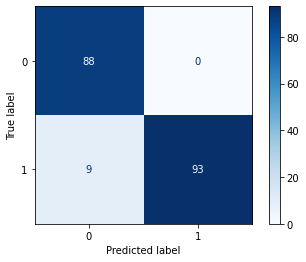

In [16]:
# كيف نقرأ هذه المصفوفة 
# نجري تقاطعا
#  أن النموذج يكون صحيح عندما يكون العنصر المتنبئ به يساوي قيمة التنبوء
# مثلاً نقاطع عند 0 على محور الأفقي و 0 عند المحور العامودي نحصل على 86 تنبؤ صحيح 
# نقرأ الرقم 9 على الشكل التالي 9 أشخاص لم يقوموا بالتزوير تنبأ النموذج بأنهم قاموا بالتزوير أي تنبؤ خاطى
# وهكذا 
disp = plot_confusion_matrix(log,X_test,y_test,cmap='Blues',values_format='.3g')

In [17]:
disp.confusion_matrix

array([[88,  0],
       [ 9, 93]], dtype=int64)

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)
a2 = accuracy_score(y_test,y_pred2)

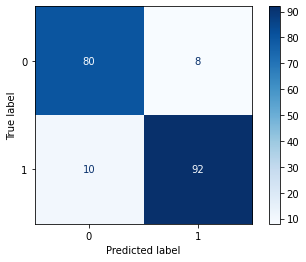

In [19]:
disp = plot_confusion_matrix(dt,X_test,y_test,cmap='Blues',values_format='.3g')

In [20]:
disp.confusion_matrix

array([[80,  8],
       [10, 92]], dtype=int64)

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)
a3 = accuracy_score(y_test,y_pred3)

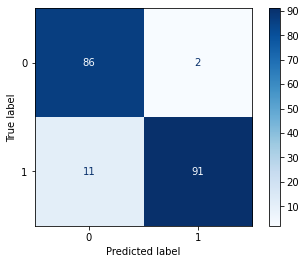

In [22]:
disp = plot_confusion_matrix(rf,X_test,y_test,cmap='Blues',values_format='.3g')

In [23]:
disp.confusion_matrix

array([[86,  2],
       [11, 91]], dtype=int64)

In [24]:
acc = pd.DataFrame({'model':['LR','DT','RF'],
             'ACC':[a1,a2,a3]})

acc

,model,ACC
0,LR,0.952632
1,DT,0.905263
2,RF,0.931579


<AxesSubplot:xlabel='model', ylabel='ACC'>

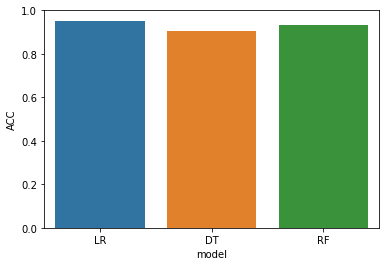

In [25]:
sns.barplot(acc['model'],acc['ACC'])

In [26]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [27]:
X = data.drop('Class',axis=1)
y = data['Class']

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
X_re,y_re = SMOTE().fit_resample(X,y)


In [30]:
print('Shape of X_re',X_re.shape)
print('Shape of y_re',y_re.shape)

Shape of X_re (550380, 29)
Shape of y_re (550380,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, test_size=0.20, random_state=42)

In [32]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)
a1 = accuracy_score(y_test,y_pred1)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)
a2 = accuracy_score(y_test,y_pred2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)
a3 = accuracy_score(y_test,y_pred3)

In [ ]:
acc = pd.DataFrame({'model':['LR','DT','RF'],
             'ACC':[a1,a2,a3]})

acc

In [ ]:
sns.barplot(acc['model'],acc['ACC'])

In [ ]:
precision_score(y_test,y_pred1),precision_score(y_test,y_pred1),precision_score(y_test,y_pred1)

In [ ]:
recall_score(y_test,y_pred1),recall_score(y_test,y_pred2),recall_score(y_test,y_pred3)

In [ ]:
f1_score(y_test,y_pred1),f1_score(y_test,y_pred2),f1_score(y_test,y_pred3)

In [33]:
log = LogisticRegression()
log.fit(X_re,y_re)
joblib.dump(log,'credit_card_model')
model = joblib.load('credit_card_model')

In [34]:
l = []

for i in range(1,30):
    l.append(1)
    
p = model.predict([l])

if p == 0:
    print('Normal Transcation')
else:
    print('Fraudlent Transcation')

Normal Transcation
